# Házi - Linear Regression

## 1) Adat betöltés
- Töltsd be az X.npy és y.npy numpy fileokat. (Segítség: használd a numpy load függvényét: `X = np.load('X.npy')`)
  - Mindkettő egy-egy vektor, X és y
- Nézd meg a shape-jét X-nek és y-nak, hogy meggyőzödj arról, hány adatpont van
- Hozz létre train és test halmazokat X és y alapján (teljesen jó úgy, ahogy órán csináltuk, hogy minden páros 2. elem a train, minden páratlan 2. elem a test)
- matplotlibbel ábrázold az X függvényében az y értékeket (train és test halmazokat külön-külön kezeld, szóval X_train függvényében ábrázold az y_train értékeket, és X_test függvényében az y_test értékeket)

## 2) Lineáris regresszió
- A cél az, hogy egy $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ alakú lineáris regressziót illesszünk az adatokra. Az illesztendő modellből láthatod, hogy $X$-ben nem lineáris a függvény, viszont a súlyok tekintetében igen. Ez egy jó példa arra, hogy a lineáris regresszió az egyszerű 2D-s esetben jelenthet egy sima egyenes illesztést is, de itt most erre úgy gondolj inkább, hogy van egy 3 dimenziós problémád, aminek az egyik tengelyén $X$ feature szerepel, a másikon pedig $X^2$.
- Ahhoz, hogy meg tudd illeszteni a kért alakot, át kell alakítanod az `X_train` és `X_test` arrayeket:
  
X_train = [$x_1$, $x_2$, ...] $\longrightarrow$ X_train_reshaped = [[$x_1$, $x_1^2$], [$x_2$, $x_2^2$], ...] 

X_test = [$x_1$, $x_2$, ...] $\longrightarrow$ X_test_reshaped = [[$x_1$, $x_1^2$], [$x_2$, $x_2^2$], ...] 

- Most már meg tudod illeszteni a LinearRegression modelledet az `X_train_reshaped` és `y_train` adatokra
- A modelled által prediktált értékeket pedig az `X_test_reshaped` adatokra számold ki, és ábrázold a prediktált értékek függvényében a valós értékeket (tehát:
`model.predict(X_test_reshaped)` függvényében ábrázold az `y_test` értékeket). Rajzold be a $45 \degree$-os egyenest is ahogy órán is csináltam.

-------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
x = np.load("X.npy")
y = np.load("Y.npy")
print(x.shape, y.shape)

(1000,) (1000,)


In [6]:
x_train = x[::2]
x_test = x[1::2]

y_train = y[::2]
y_test = y[1::2]

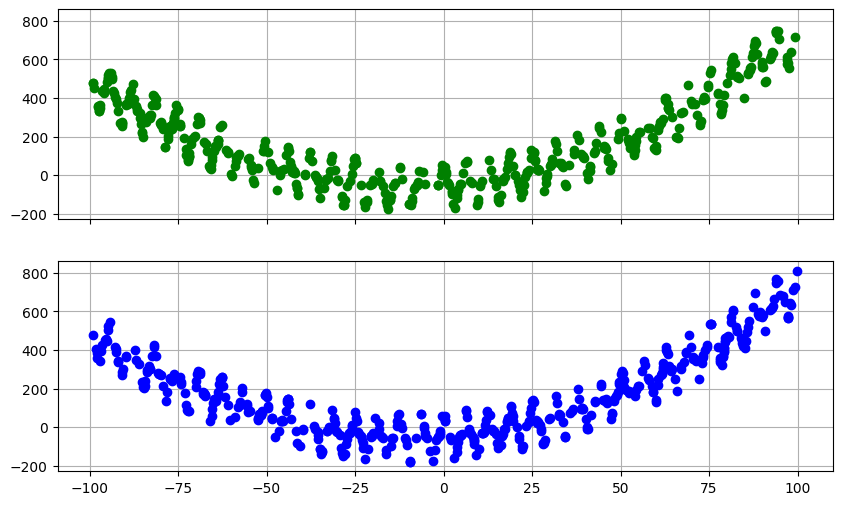

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), facecolor="white", sharey=True, sharex=True)

axs[0].plot(x_train, y_train, "g", marker="o", linestyle="")
axs[1].plot(x_test, y_test, "b", marker="o", linestyle="")

axs[0].grid(visible=True, axis="both")
axs[1].grid(visible=True, axis="both")

plt.show()

In [18]:
x_train_reshaped = []
x_test_reshaped = []
for x_value in x_train:
    x_train_reshaped.append([x_value, x_value ** 2])
for x_value in x_test:
    x_test_reshaped.append([x_value, x_value ** 2])

[[90.14286128198324, 8125.735440102873], [19.73169683940732, 389.3398601622768], [-68.80109593275947, 4733.590801548771], [73.23522915498702, 5363.398789383462], [41.61451555920911, 1731.7679052276571], [93.98197043239887, 8832.610766356294], [-57.53217786434477, 3309.951489814602], [-63.31909802931324, 4009.3081752457797], [4.951286326447573, 24.5152362864667], [-41.754171960391616, 1743.4108760979534], [-72.10122786959164, 5198.587060302778], [-26.727631341261656, 714.3662771143923], [57.03519227860272, 3253.0131582571835], [2.8468876827223255, 8.104769478036092], [-90.70991745600045, 8228.289124874416], [-65.8951752625417, 4342.174122881087], [89.77710745066665, 8059.929022208545], [61.67946962329222, 3804.356973010628], [-80.46557719872322, 6474.709113923687], [-11.969501252079738, 143.26896022353841], [-0.9646179777459594, 0.9304878429907042], [81.8640804157564, 6701.727662317431], [32.50445687079639, 1056.5397164654626], [4.0136042355621555, 16.109018959722476], [-63.029108894894